In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("D:\IITG\other courses\AIML project1\Churn_data.csv")

# Explore the dataset
print(df.info())  # Check data types and non-null counts
print(df.head())  # Inspect the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values in 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric if not already
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)  # Fill missing with median


Missing values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Verify encoding
print(df[binary_columns].head())


   Partner  Dependents  PhoneService  PaperlessBilling  Churn
0        1           0             0                 1      0
1        0           0             1                 0      0
2        0           0             1                 1      1
3        0           0             0                 0      0
4        0           0             1                 1      1


In [10]:
# One-hot encode categorical columns
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify encoding
print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService OnlineSecurity OnlineBackup DeviceProtection  ... Churn  \
0             0             No          Yes               No  ...     0   
1             1            Yes           No              Yes  ...     0   
2             1            Yes          Yes               No  ...     1   
3             0            Yes           No              Yes  ...     0   
4             1             No           No               No  ...     1   

  InternetService_Fiber optic InternetService_No  Contract_One year  \
0                       False              False              F

In [11]:
df.drop(columns=['customerID', 'gender'], inplace=True)

# Verify the remaining columns
print(df.columns)


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes'],
      dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify scaling
print(df[numerical_columns].head())


     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994242
1  0.066327       -0.259629     -0.173244
2 -1.236724       -0.362660     -0.959674
3  0.514251       -0.746535     -0.194766
4 -1.236724        0.197365     -0.940470


In [13]:
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target

# Verify feature and target data
print(X.head())
print(y.head())


   SeniorCitizen  Partner  Dependents    tenure  PhoneService OnlineSecurity  \
0              0        1           0 -1.277445             0             No   
1              0        0           0  0.066327             1            Yes   
2              0        0           0 -1.236724             1            Yes   
3              0        0           0  0.514251             0            Yes   
4              0        0           0 -1.236724             1             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV  ... TotalCharges  \
0          Yes               No          No          No  ...    -0.994242   
1           No              Yes          No          No  ...    -0.173244   
2          Yes               No          No          No  ...    -0.959674   
3           No              Yes         Yes          No  ...    -0.194766   
4           No               No          No          No  ...    -0.940470   

   InternetService_Fiber optic  InternetService_No  Cont

In [14]:
print(X.dtypes)  # Should return only numeric data types


SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed

In [15]:
# Encode remaining binary categorical columns
binary_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in binary_columns:
    X[col] = X[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Verify all features are numeric
print(X.dtypes)  # Should return only numeric data types
print(X.head())  # Inspect the first few rows


SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (5634, 23)
Testing set size: (1409, 23)


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.44      0.52       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409

ROC-AUC Score: 0.8321640771372674


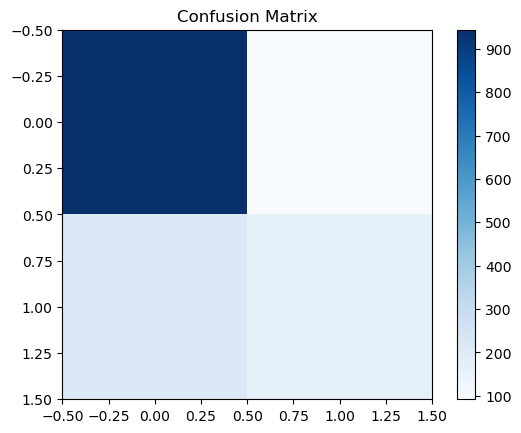

In [21]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Classification metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


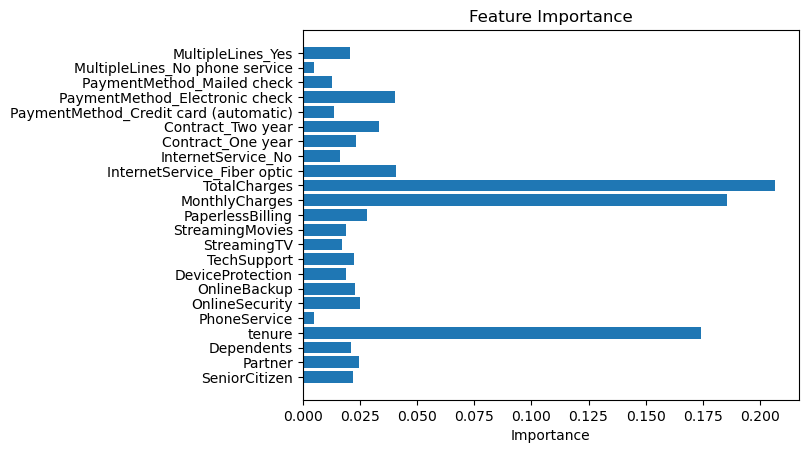

In [19]:
# Feature Importance
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()
